#                                                 <font color='green'>S&P 500 Financial Data <font>
    Objective: Financial Data Analysis of US Market

Description : It includes numerous financial metrics that many professionals often use to value companies.
This data is a look at the companies that comprise the S&P 500 (Standard & Poor's 500).

S&P 500 : The S&P 500 is a capitalization-weighted index of the top 500 publicly traded companies in the United States (top 500 meaning the companies with the largest market cap). The S&P 500 index is a useful index to study because it generally reflects the health of the overall U.S. stock market.

## importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [158]:
import plotly.express as px
%matplotlib inline

from operator import itemgetter
from collections import defaultdict

## Understanding the Data Set


*  Price/Earnings - financial indicator equal to the ratio of the market value of a share to the annual earnings per share.

* Dividend yield is the ratio of the annual dividend per share to the share price. This value is most often expressed as a percentage.

* Earnings/Share - financial indicator equal to the ratio of the company's net profit available for distribution to the average annual number of ordinary shares.

* EBITDA is an analytical indicator equal to the amount of profit before deduction of expenses on payment of interest, taxes, depreciation and amortization.

* Price/Sales - financial indicator equal to the ratio of a company's market capitalization to its annual revenue.

* Price/book - financial ratio equal to the ratio of the company's current market capitalization to its book value.

## Loading the Data Set

In [32]:
df=pd.read_csv('C:\\Users\\RAHUL\\Desktop\\financials.csv')
df.rename(columns={"52 Week Low": "52 Week High", "52 Week High": "52 Week Low"},inplace=True)
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Data Cleaning
 Handling Missing Values

In [35]:
df[df.isna().any(axis=1)]
#len(df[df.isna().any(axis=1)]) = 10

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
55,ARNC,Arconic Inc,Industrials,24.45,20.21,0.956175,-0.21,31.17,21.755,1.212330e+10,1.517000e+09,0.942148,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
199,FL,Foot Locker Inc,Consumer Discretionary,45.88,9.50,2.582795,4.91,77.86,28.420,5.819080e+09,9.570000e+08,1.036295,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
225,HCA,HCA Holdings,Health Care,95.97,14.07,1.422764,5.94,106.84,71.180,3.444905e+10,8.202000e+09,0.725192,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
292,MRO,Marathon Oil Corp.,Energy,15.68,-32.00,1.224740,-2.65,19.52,10.550,1.387501e+10,2.266000e+09,4.657875,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.09,57.200,5.346769e+10,5.205000e+09,6.044895,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
358,PEP,PepsiCo Inc.,Consumer Staples,110.15,21.51,2.837004,4.36,122.51,104.770,1.614133e+11,1.284300e+10,3.670506,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
360,PRGO,Perrigo,Health Care,84.44,NaN,0.731261,-28.01,95.93,63.680,1.232638e+10,0.000000e+00,3.385007,2.03,http://www.sec.gov/cgi-bin/browse-edgar?action...
430,TPR,"Tapestry, Inc.",Consumer Discretionary,48.85,NaN,0.000000,2.09,50.71,36.690,1.424720e+10,0.000000e+00,4.078549,4.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
450,TDG,TransDigm Group,Industrials,283.00,23.76,0.000000,7.92,321.38,203.720,1.524120e+10,1.635916e+09,4.268832,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
460,UNP,Union Pacific,Industrials,124.86,22.06,2.062655,13.52,143.05,101.060,1.015133e+11,1.016900e+10,4.860507,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [110]:
df[df['Symbol']=='C']

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
114,C,Citigroup Inc.,Financials,71.87,13.48,1.706894,-3.1,80.7,56.14,1.927093e+11,0.0,2.185759,0.9,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [36]:
df.dropna(how='any',inplace=True)

In [37]:
df[df.isna().any(axis=1)]    # no missing values present

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          495 non-null    object 
 1   Name            495 non-null    object 
 2   Sector          495 non-null    object 
 3   Price           495 non-null    float64
 4   Price/Earnings  495 non-null    float64
 5   Dividend Yield  495 non-null    float64
 6   Earnings/Share  495 non-null    float64
 7   52 Week High    495 non-null    float64
 8   52 Week Low     495 non-null    float64
 9   Market Cap      495 non-null    float64
 10  EBITDA          495 non-null    float64
 11  Price/Sales     495 non-null    float64
 12  Price/Book      495 non-null    float64
 13  SEC Filings     495 non-null    object 
dtypes: float64(10), object(4)
memory usage: 58.0+ KB


# Data visualisation

### Companies count per sector - histogram

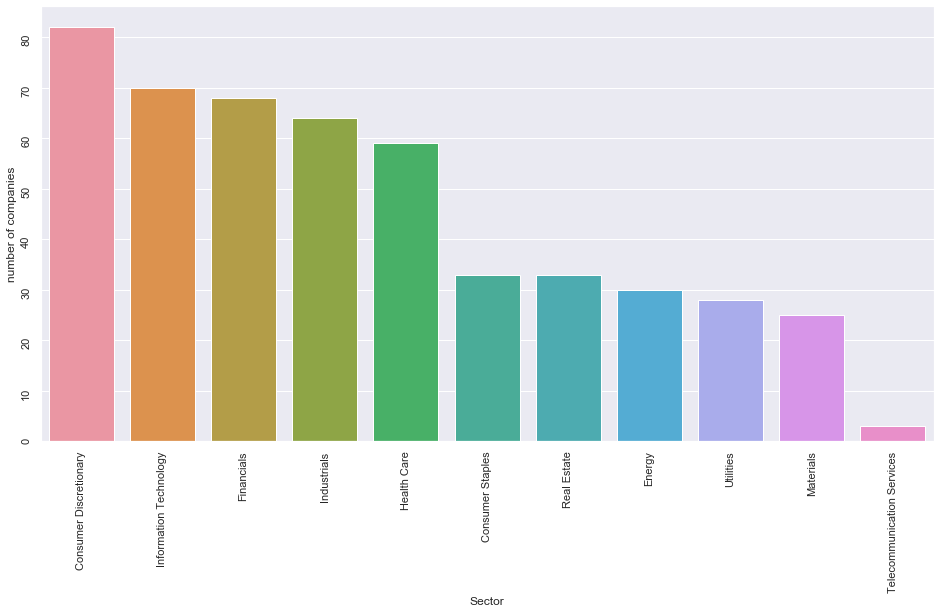

In [97]:
sns.set(rc={"figure.figsize":(16, 8)})

sectorcount = df.groupby(["Sector"]).size().reset_index(name = "number of companies")
sectorcount=sectorcount.sort_values(by='number of companies',ascending=False)
sectorcount.reset_index()
ax = sns.barplot(x="Sector", y="number of companies", data=sectorcount)
ax.tick_params(labelrotation=90)

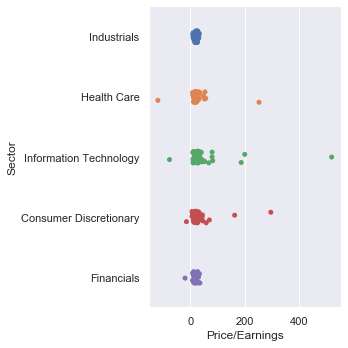

In [121]:
top5data = df[(df["Sector"] == "Consumer Discretionary")|(df["Sector"] == "Information Technology")|(df["Sector"] == "Financials")|(df["Sector"] == "Industrials")
             |(df["Sector"] == "Health Care")]
sns.catplot(x ='Price/Earnings', y = 'Sector', data = top5data)
sns.set(rc={'figure.figsize':(15,5)})

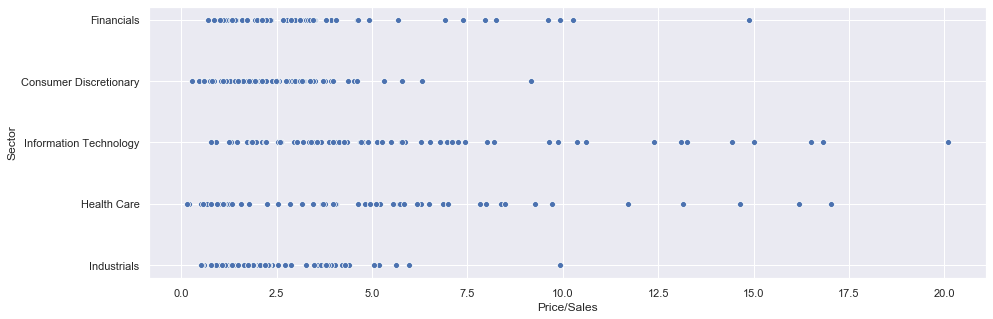

In [122]:
sns.scatterplot(x ='Price/Sales', y = 'Sector', data = top5data)

### top 10 companies in terms of market capital (share price * number of shares)

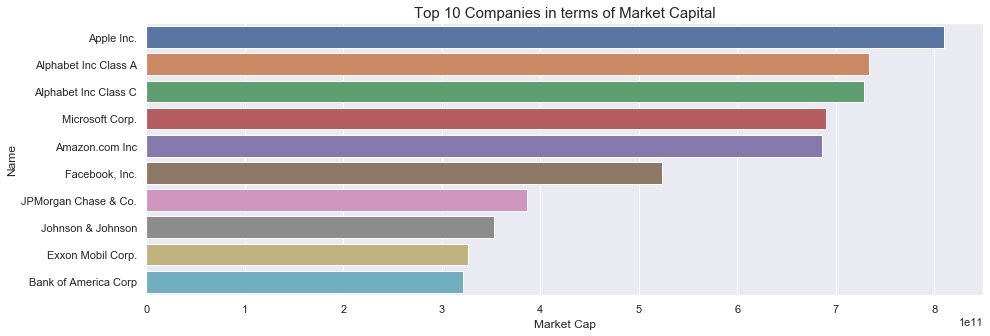

In [112]:

cols = ['Name','Market Cap']
marcapdf = df[cols].sort_values(by=['Market Cap'],ascending=False).head(10)
#display(marcapdf)
plt.xlabel('Market Cap in 100B')
plt.ylabel('Company Name')
plt.title('Top 10 Companies in terms of Market Capital',fontsize = 15)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=marcapdf['Market Cap'],y=marcapdf['Name'])

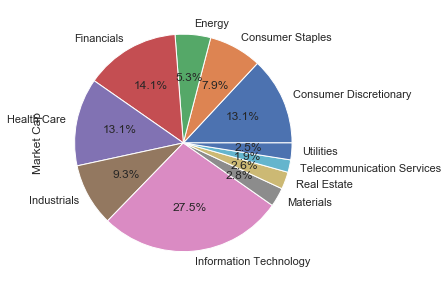

In [144]:
# percentage share in market cap
df.groupby('Sector')['Market Cap'].sum().plot.pie(autopct="%.1f%%",figsize=(10,5))

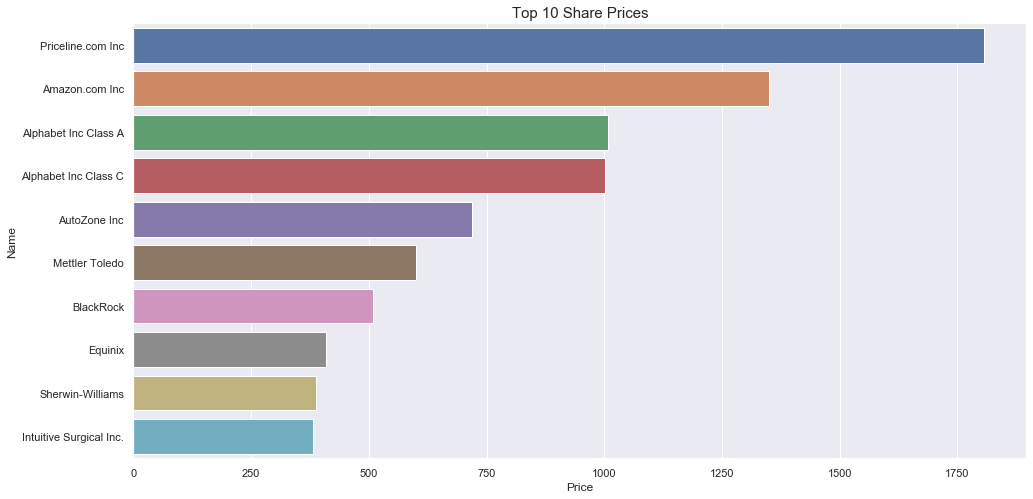

In [184]:
# top 10 shares
cols = ['Name','Price'] 
sharedf = df[cols].sort_values(by='Price',ascending=False).head(10)
#display(sharedf)
plt.xlabel('Share price')
plt.ylabel('Company Name')
plt.title('Top 10 Share Prices',fontsize = 15)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=sharedf['Price'],y=sharedf['Name'])

In [185]:
#highest and lowest share price
comdf=df[['Name','Sector','Price']]
minmaxsharedf = pd.DataFrame(comdf.loc[comdf['Price'].isin(comdf.min())|comdf['Price'].isin(comdf.max())])
minmaxsharedf.style.highlight_max(color='lightgreen').highlight_min(color='red')

,Name,Sector,Price
104,Chesapeake Energy,Energy,2.820000
372,Priceline.com Inc,Consumer Discretionary,1806.060000


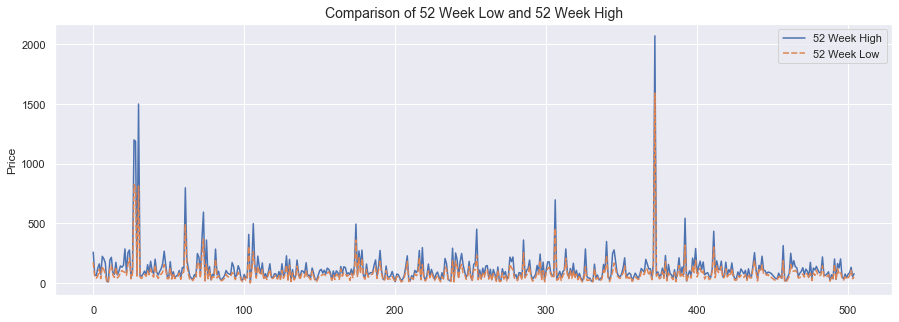

In [115]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(data=df[ ['52 Week High', '52 Week Low'] ])
plt.ylabel('Price')
plt.title('Comparison of 52 Week Low and 52 Week High',fontsize=14)
plt.show(ax)

## What it means for CitiGroup Inc.

In [131]:
citi = df[df['Name']=='Citigroup Inc.']
price = citi['Price']
high = citi['52 Week High']
low = citi['52 Week Low']
display(citi)
highper = (1 - (price/high))*100
print ("Current share price is %f percent less than the 52 - week high "% (highper)) 
lowper = ((price/low)-1)*100 
print ("Current share price is %f percent more than the 52 - week low "% (lowper))

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
114,C,Citigroup Inc.,Financials,71.87,13.48,1.706894,-3.1,80.7,56.14,1.927093e+11,0.0,2.185759,0.9,http://www.sec.gov/cgi-bin/browse-edgar?action...


Current share price is 10.941760 percent less than the 52 - week high 
Current share price is 28.019238 percent more than the 52 - week low 


### Price Per Earnings of Top Company in Each Sector

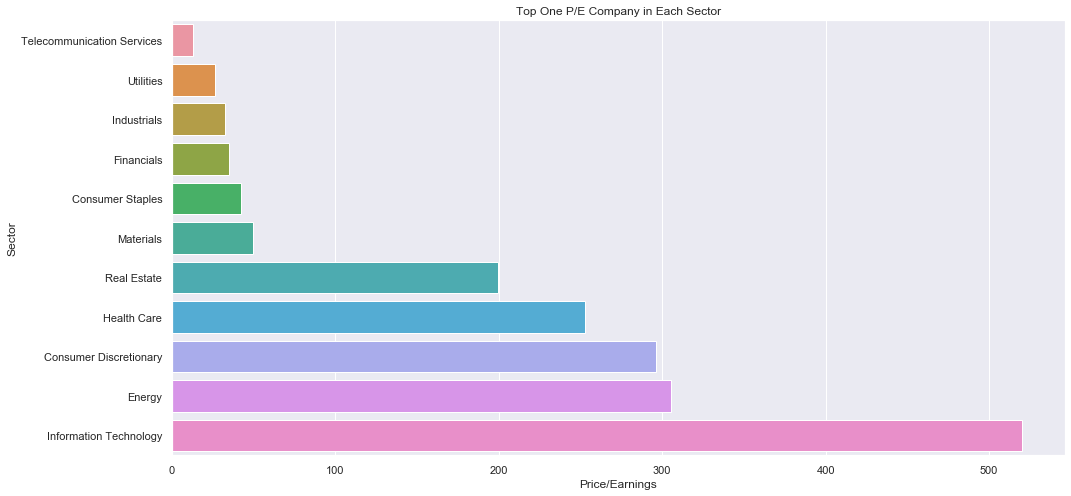

In [183]:
sns.set(rc={"figure.figsize":(16, 8)})
PEdf= df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "Price/Earnings", ascending = False). head(1))

PEdf=PEdf.sort_values(by='Price/Earnings')
ax=sns.barplot(x = "Price/Earnings", y = "Sector", data = PEdf)          
plt.title("Top One P/E Company in Each Sector")
ax.tick_params(labelrotation=0)

In [189]:
PEdf= df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "Price/Earnings", ascending = False). head(1))
PEdf=PEdf.sort_values(by='Price/Earnings')
PEdf[['Name','Sector']]

,,Name,Sector
Sector,,,
Telecommunication Services,474,Verizon Communications,Telecommunication Services
Utilities,37,American Water Works Company Inc,Utilities
Industrials,112,Cintas Corporation,Industrials
Financials,93,CBOE Holdings,Financials
Consumer Staples,317,Monster Beverage,Consumer Staples
Materials,154,DowDuPont,Materials
Real Estate,404,SBA Communications,Real Estate
Health Care,475,Vertex Pharmaceuticals Inc,Health Care
Consumer Discretionary,30,Amazon.com Inc,Consumer Discretionary


### Price Per Sales of Top Company in Each Sector

Text(0.5, 1.0, 'Top One P/S Company in Each Sector')

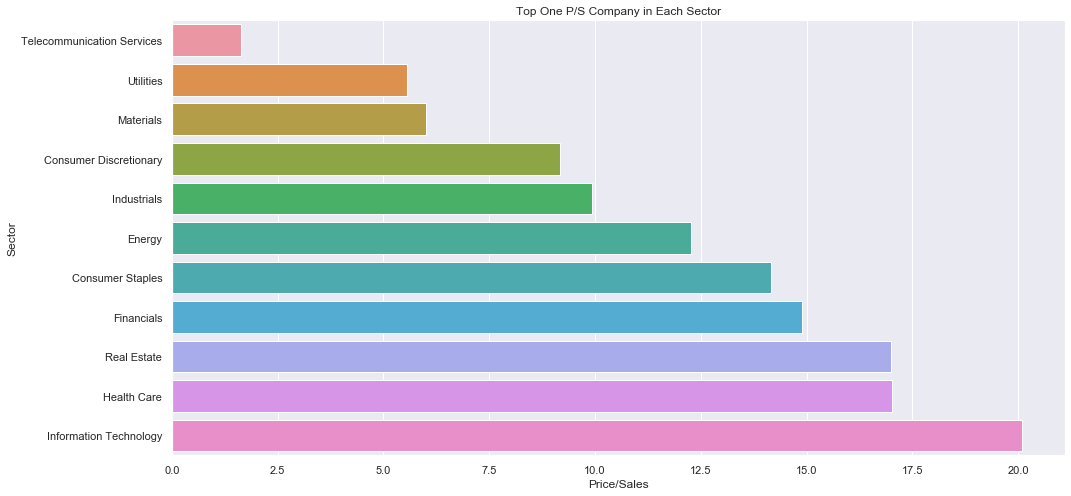

In [169]:
sns.set(rc={"figure.figsize":(16, 8)})
PSdf = df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "Price/Sales", ascending = False). head(1))
PSdf=PSdf.sort_values(by='Price/Sales')
sns.barplot(x = "Price/Sales", y = "Sector", data = PSdf)        # horizontal bar


plt.title("Top One P/S Company in Each Sector")

In [190]:
PSdf= df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "Price/Earnings", ascending = False). head(1))
PSdf=PSdf.sort_values(by='Price/Earnings')
PSdf[['Name','Sector']]

,,Name,Sector
Sector,,,
Telecommunication Services,474,Verizon Communications,Telecommunication Services
Utilities,37,American Water Works Company Inc,Utilities
Industrials,112,Cintas Corporation,Industrials
Financials,93,CBOE Holdings,Financials
Consumer Staples,317,Monster Beverage,Consumer Staples
Materials,154,DowDuPont,Materials
Real Estate,404,SBA Communications,Real Estate
Health Care,475,Vertex Pharmaceuticals Inc,Health Care
Consumer Discretionary,30,Amazon.com Inc,Consumer Discretionary


## PE- Tells company is undervalued or overvalued
## PS-Lower the better company to invest


[Text(0, 0, 'Consumer Discretionary'),
 Text(0, 0, 'Consumer Staples'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Telecommunication Services'),
 Text(0, 0, 'Utilities')]

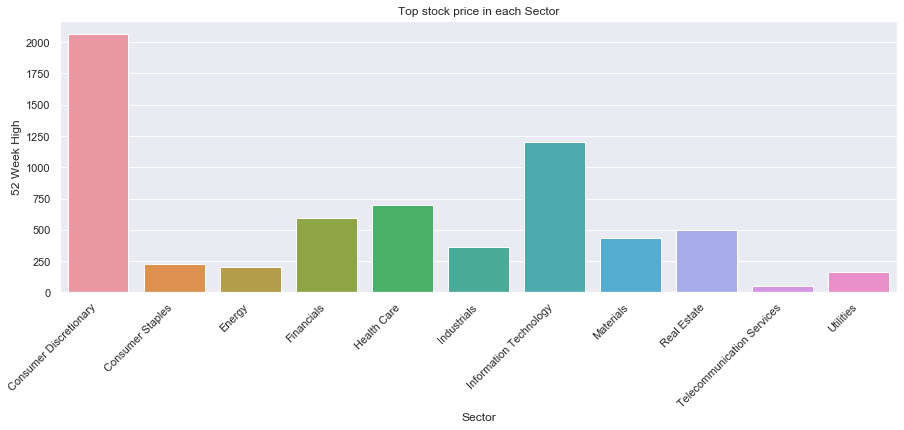

In [125]:
# TOP STOCK PRICE

df_pe = df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "52 Week High", ascending = False). head(1))

chart = sns.barplot(x = "Sector", y = "52 Week High", data = df_pe)           
plt.title("Top stock price in each Sector")  
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Consumer Discretionary'),
 Text(0, 0, 'Consumer Staples'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Telecommunication Services'),
 Text(0, 0, 'Utilities')]

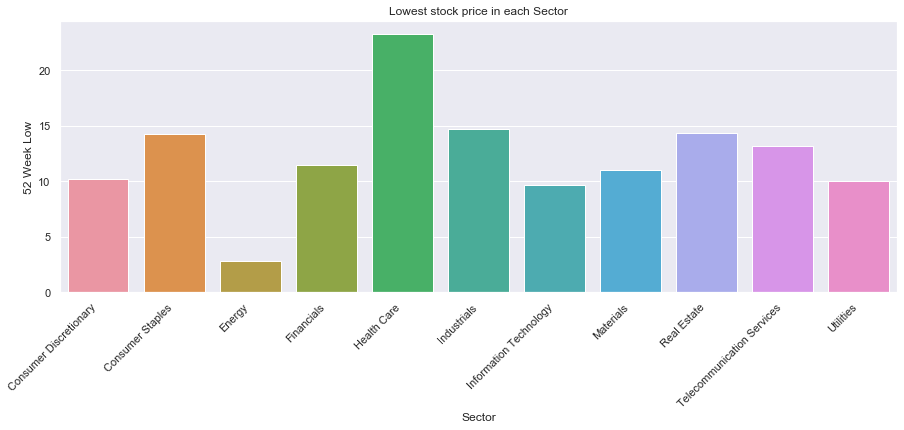

In [127]:
# LOW STOCK PRICE 

df_pel = df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "52 Week Low", ascending = True). head(1))
chart = sns.barplot(x = "Sector", y = "52 Week Low", data = df_pel)
plt.title("Lowest stock price in each Sector")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [164]:
 # Average stock prices of each sector - Green-max & Red-min 
secdf=pd.DataFrame(df.groupby('Sector')['Price'].mean())
secdf.style.highlight_max(color='lightgreen').highlight_min(color='red')

,Price
Sector,
Consumer Discretionary,125.904512
Consumer Staples,78.843333
Energy,58.941667
Financials,89.056029
Health Care,133.950000
Industrials,115.611875
Information Technology,119.242857
Materials,102.386800
Real Estate,88.712727


[Text(0, 0, 'Consumer Discretionary'),
 Text(0, 0, 'Consumer Staples'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Telecommunication Services'),
 Text(0, 0, 'Utilities')]

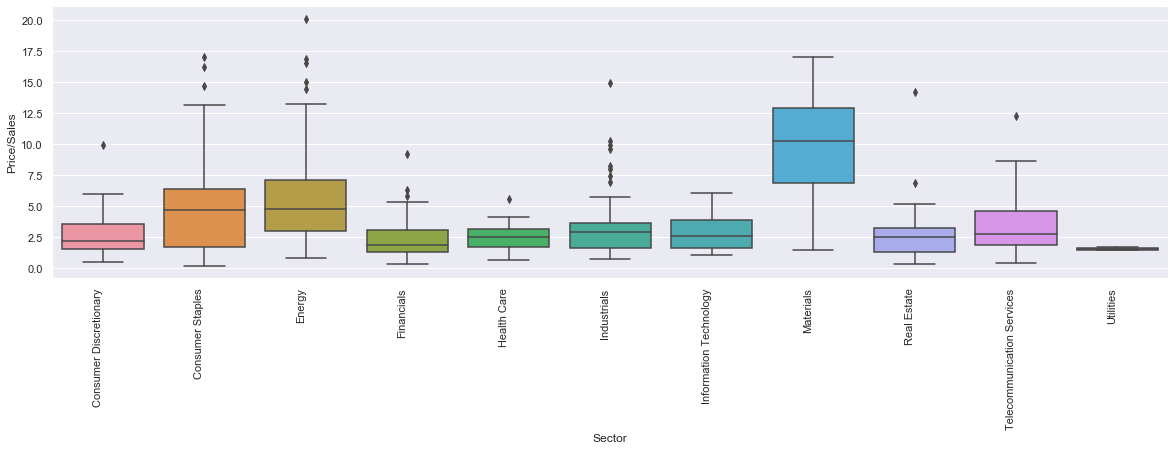

In [132]:
#Box plots to understand outliers

fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="Sector", y="Price/Sales", data=df)
ax.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

[Text(0, 0, 'Consumer Discretionary'),
 Text(0, 0, 'Consumer Staples'),
 Text(0, 0, 'Energy'),
 Text(0, 0, 'Financials'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Industrials'),
 Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Materials'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Telecommunication Services'),
 Text(0, 0, 'Utilities')]

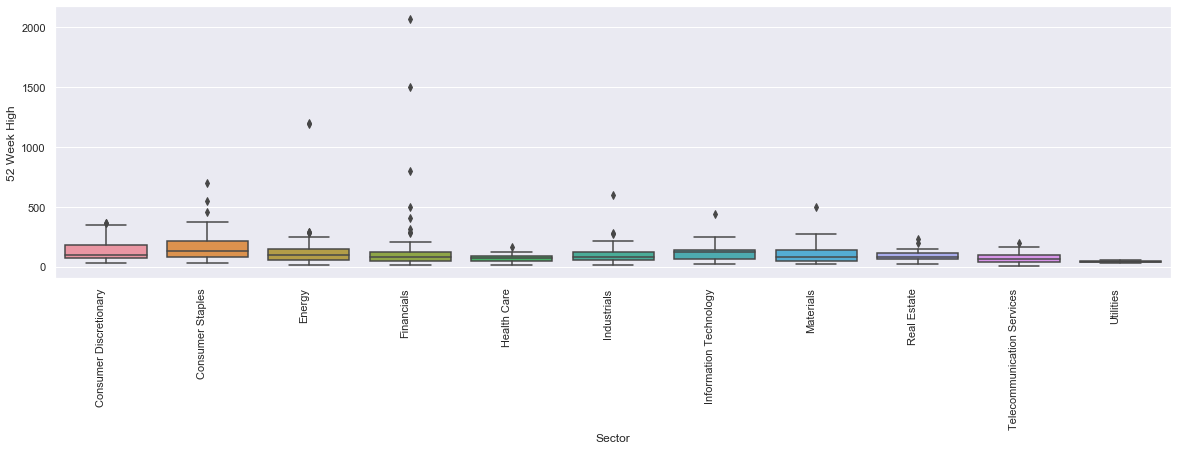

In [135]:
#Box plots to understand outliers

fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="Sector", y="52 Week High", data=df)
ax.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

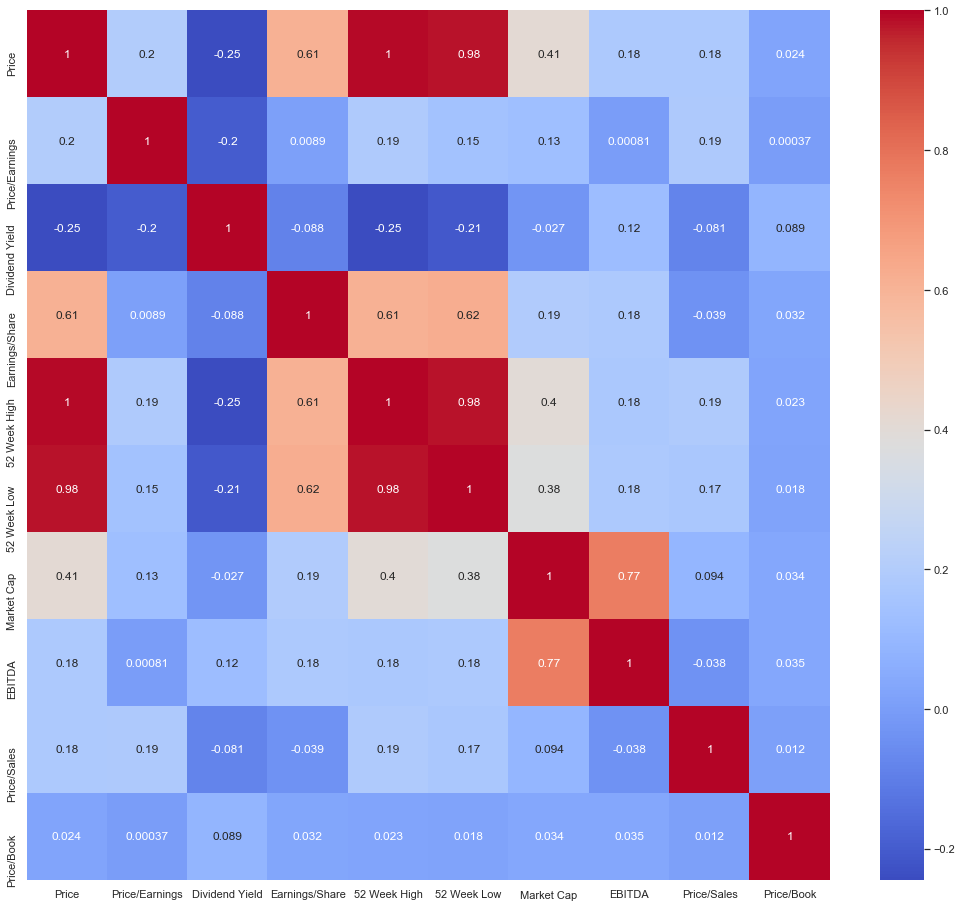

In [141]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

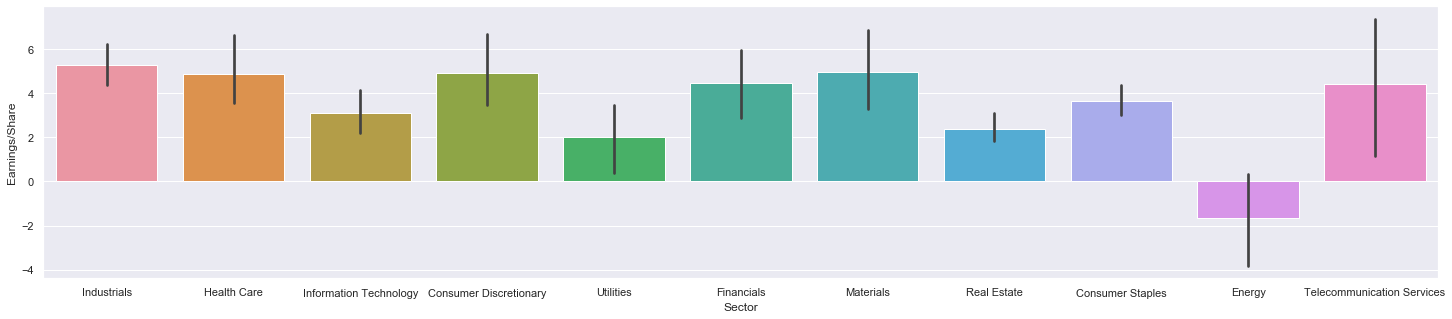

In [142]:
# Earning / Share for each sector
fig = plt.figure(figsize=(25,5))
sns.barplot(x='Sector',y='Earnings/Share',data=df) 

# Comparision of Citi to Financial Sector

In [170]:
#Citi data

df_citi = df.iloc[114]
print(df_citi)
citi_final = np.array(df_citi)

#Get average for sectors
sector = df.groupby('Sector')
sector.first()
avg =pd.DataFrame(df.groupby('Sector').mean())
avg.iloc[3]

Symbol                                                          CFG
Name                                       Citizens Financial Group
Sector                                                   Financials
Price                                                         42.19
Price/Earnings                                                16.04
Dividend Yield                                              1.96253
Earnings/Share                                                 3.27
52 Week High                                                  48.23
52 Week Low                                                   31.51
Market Cap                                              2.20081e+10
EBITDA                                                            0
Price/Sales                                                 3.39173
Price/Book                                                     1.08
SEC Filings       http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: 115, dtype: object


Price             8.905603e+01
Price/Earnings    1.719897e+01
Dividend Yield    2.017241e+00
Earnings/Share    4.436912e+00
52 Week High      1.018218e+02
52 Week Low       7.269447e+01
Market Cap        5.062720e+10
EBITDA            5.290676e+08
Price/Sales       3.358182e+00
Price/Book        6.735294e+00
Name: Financials, dtype: float64

In [180]:
labels = ['Price', 'Price/Earnings','Dividend Yield','Earnings/Share']

y1 = [89.05602941176471,17.19897058823529,2.0172406950000004,4.436911764705883]

y2 =  [71.87, 13.48,1.7068942999999999, -3.1]

width=0.4

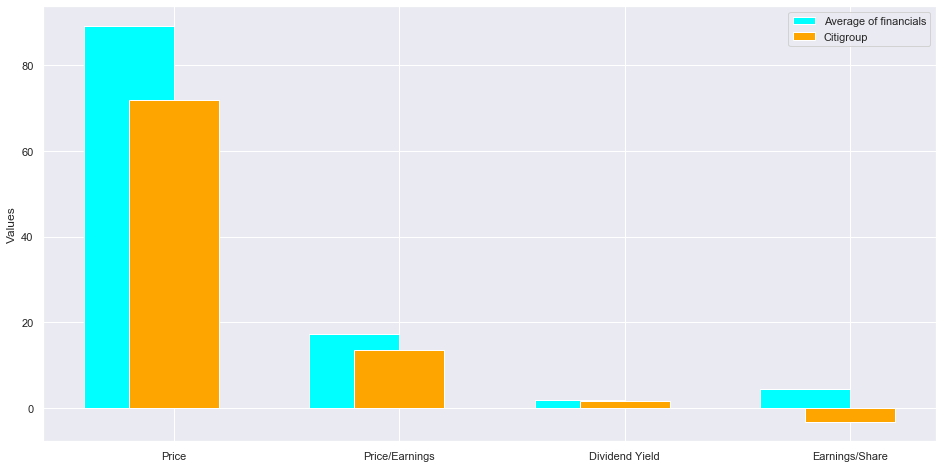

In [181]:
x = np.arange(4)

plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')

plt.xticks(x, ['Price', 'Price/Earnings','Dividend Yield','Earnings/Share'])
plt.ylabel("Values")
plt.legend(["Average of financials", "Citigroup"])
plt.show()


In [173]:
labels = ['52_week_high', '52_week_low']

y1 = [101.8218485294118,72.69446764705884]

y2 =[80.7, 56.14]

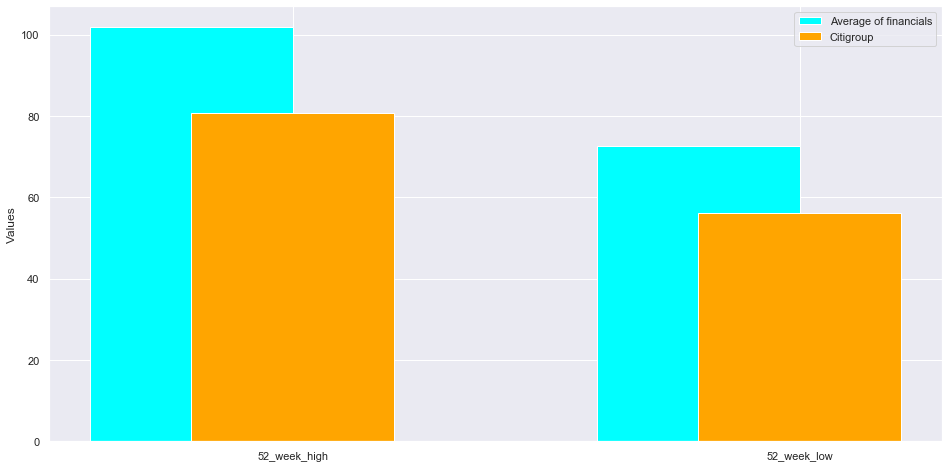

In [174]:
x = np.arange(2)
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, 
['52_week_high',      
'52_week_low'])
plt.ylabel("Values")
plt.legend(["Average of financials", "Citigroup"])
plt.show()

In [175]:
labels = ['Price/Sales','Price/Book']

y1 = [3.358181680441177,6.735294117647059]

y2 =[2.1857585999999998, 0.9]

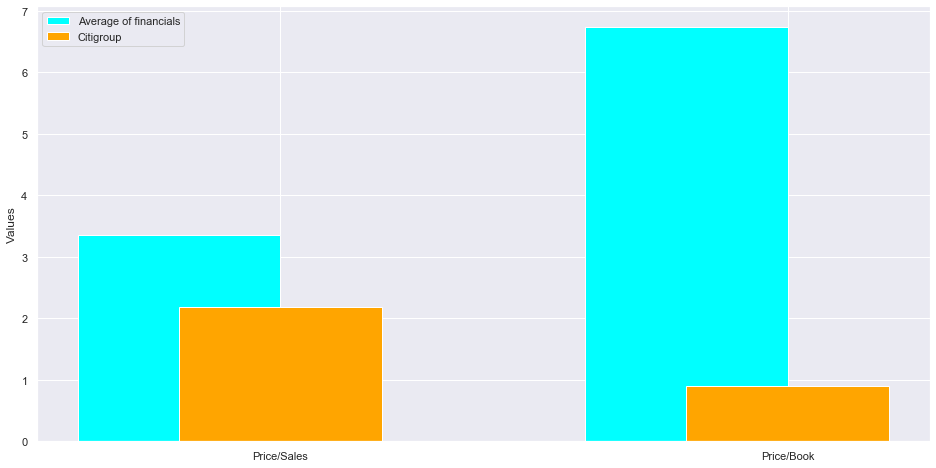

In [176]:
x = np.arange(2)
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Price/Sales' , 'Price/Book'])
plt.ylabel("Values")
plt.legend(["Average of financials", "Citigroup"])
plt.show()

#                                                                 THE END